# Simple tennis statistical scatter plot

## 1. Introduction 
This project aims to produce a simple interactive scatter plot of ATP tennis player data using Python. The statistics of use will be 1. % of break points per service game, 2. % of break points per return game, which can be interpreted as measures of each player's service (advantage capitalisation) and return (defense-to-offense transition) game. The scatter plot will allow us to service/return traits of the top players and also players with similar game characteristics. A non-exhaustive list of interactive functions includes: <br>
- Tooltips indicating statistical values/ player nationality/ highest rank/ closest player based on euclidean distance  
- Tournament filters
- Yearly filters
- Surface filters 


## 2. Data exploration
Data has been sourced directly from http://www.ultimatetennisstatistics.com/ (stunning website by the way!) and copied straight to .txt/.csv format. 

In [1]:
#Imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the file 
sBP_data = pd.read_csv('tennisBPpsg_1991.csv', names = ['Nat', 'Name', 'BP per serve', 'Status'])
sBP_data.head() #inspect first 5 rows

,Nat,Name,BP per serve,Status
0,USA,Aaron Krickstein,0.626,N
1,FRA,Adrian Mannarino,0.608,A
2,ROU,Adrian Voinea,0.627,N
3,ARG,Agustin Calleri,0.535,N
4,ESP,Albert Costa,0.565,N


In [3]:
#Check for null data
sBP_data.isnull().values.any()

False

In [4]:
rBP_data = pd.read_csv('tennisBPprg_1991.csv', names = ['Nat', 'Name', 'BP per return', 'Status'])
rBP_data.head() #inspect first 5 rows

,Nat,Name,BP per return,Status
0,USA,Aaron Krickstein,0.677,N
1,FRA,Adrian Mannarino,0.535,A
2,ROU,Adrian Voinea,0.556,N
3,ARG,Agustin Calleri,0.605,N
4,ESP,Albert Costa,0.653,N


In [5]:
rBP_data.isnull().values.any()

False

Each dataset contains the following information:
- ``Nat``: Nationality
- ``Name``: Name
- ``%BP per serve``: Percentage of break points per service game
- ``%BP per return``: Percentage of break points per return game
- ``Status``: Active ``A`` or Retired ``N``


In [6]:
#Merge the datasets
sBP_data['1-BP per serve']= 1-sBP_data['BP per serve']
merg_data = pd.concat([sBP_data, rBP_data['BP per return']], axis=1)
merg_data.head()

,Nat,Name,BP per serve,Status,1-BP per serve,BP per return
0,USA,Aaron Krickstein,0.626,N,0.374,0.677
1,FRA,Adrian Mannarino,0.608,A,0.392,0.535
2,ROU,Adrian Voinea,0.627,N,0.373,0.556
3,ARG,Agustin Calleri,0.535,N,0.465,0.605
4,ESP,Albert Costa,0.565,N,0.435,0.653


## 3. Simple visualisation with matplotlib/seaborn

Text(6.8,0.5,'%BP per return')

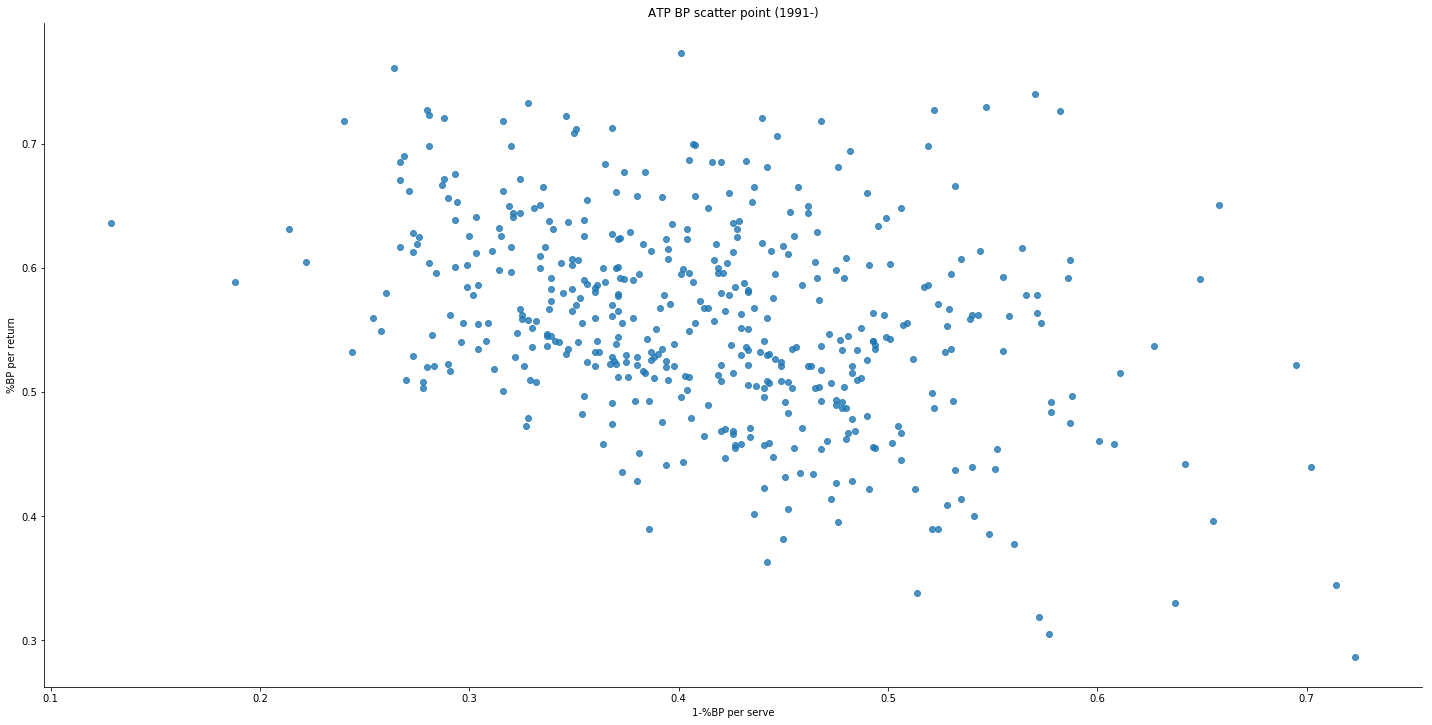

In [7]:
ax = sns.lmplot('1-BP per serve', # Horizontal axis
           'BP per return', # Vertical axis
           data = merg_data,
           size = 10,
           fit_reg=False,
           aspect =2 ) # size and dimension

plt.title('ATP BP scatter point (1991-)')
# Set x-axis label
plt.xlabel('1-%BP per serve')
# Set y-axis label
plt.ylabel('%BP per return')

## 4. Introduce some interactivity with bokeh 
The above plot is static and not very informative. Let's try out the bokeh library to introduce some interactive features to the scatter plot such as tooltips. 

In [8]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [9]:
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import Span
from bokeh.models import Label, LabelSet

source = ColumnDataSource(
        merg_data.to_dict('list')
    )

hover = HoverTool(
        tooltips=[
            ("Player","@Name"),
            ("1-BP per SG", "@{1-BP per serve}"),
            ("BP per RG", "@{BP per return}"),
            ("Status", "@Status"),
        ]
    )

p = figure(plot_width=800, plot_height=500, tools=[hover], title="ATP Break Point Statistics (1991-USO 2018) All comps")

#Plot and label axes
scatter = p.circle('1-BP per serve', 'BP per return', size=6, source=source,fill_alpha=0.05,hover_alpha=1)
p.xaxis.axis_label = '1-BP per service game'
p.yaxis.axis_label = 'BP per return game'

#Hide
#scatter.visible = False

#Plot some margins 
mean_BPpRG = Span(location=np.mean(merg_data['BP per return']),
                            dimension='width', line_color='grey',
                            line_dash='dashed', line_width=1)

mean_BPpSG = Span(location=np.mean(merg_data['1-BP per serve']),
                            dimension='height', line_color='grey',
                            line_dash='dashed', line_width=1)

p.add_layout(mean_BPpSG)
p.add_layout(mean_BPpRG)

#Some text labels
ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                 text='Weak serve, weak return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                 text='Strong serve, weak return', 
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ul = Label(x=30, y=380, x_units='screen', y_units='screen',
                 text='Weak serve, strong return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
ur = Label(x=560, y=380, x_units='screen', y_units='screen',
                 text='Strong serve, strong return',
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')

p.add_layout(ll)
p.add_layout(ul)
p.add_layout(lr)
p.add_layout(ur)

show(p)

In [10]:
#Let's label some prominent players
goats = ['Roger Federer','Rafael Nadal','Novak Djokovic','Pete Sampras','Andre Agassi','Ivan Lendl','John McEnroe']
big4 = ['Roger Federer','Rafael Nadal','Novak Djokovic','Andy Murray']
wNO1 = ['Roger Federer','Rafael Nadal','Novak Djokovic','Andy Murray', 'Andy Roddick', 'Juan Carlos Ferrero' , 'Lleyton Hewitt' \
       , 'Gustavo Kuerten', 'Marat Safin', 'Pat Rafter', 'Yevgeny Kafelnikov', 'Carlos Moya', 'Marcelo Rios', 'Thomas Muster' , 
       'Andre Agassi', 'Pete Sampras', 'Jim Courier', 'Boris Becker', 'Stefan Edberg', 'Mats Wilander', 'Ivan Lendl', 'John McEnroe']
tier2 = ['']
#Filter the DF to only include that list

df_big4 = merg_data[merg_data['Name'].isin(big4)]
df_big4

,Nat,Name,BP per serve,Status,1-BP per serve,BP per return
46,GBR,Andy Murray,0.478,A,0.522,0.727
346,SRB,Novak Djokovic,0.418,A,0.582,0.726
379,ESP,Rafael Nadal,0.430,A,0.570,0.740
396,SUI,Roger Federer,0.342,A,0.658,0.651


Add some filtering and player searching features to the scatter plot. 

In [66]:
#Demo widget function for Bokeh
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph

#Search and hint select/input widgets work here :)

def modify_doc(doc):
    
    dic = ColumnDataSource(merg_data.to_dict('list'))
    # Setting initial values
    s = Select(options=dic.data['Name'])
    
    # create some widgets
    #button = Button(label="Say HI")
    #text_input = TextInput(value="Bokeh", title="Label:")
    output = Paragraph(text="boo")

    # add a callback to a widget
    #def update():
    #    output.text = "Hello, " + text_input.value
    #button.on_click(update)
    
    def update(attr, old, new):
        #print("Previous label: " + old)
        #print("Updated label: " + new)
        s.options = merg_data[(merg_data.Name.str.lower()).str.contains(text_input.value.lower())==True]['Name'].tolist()
        #s = s[s.text.str.lower().str.contains(text_input_value)==True]
        output.text = text_input.value

    text_input = TextInput(placeholder='Enter filter', title="Search:")
    text_input.on_change("value", update)
    
    
    # create a layout for everything
    layout = column(text_input, s, output)
    #layout = column(button, text_input, output)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

In [83]:
import random
import string

from bokeh.io import show
from bokeh.layouts import widgetbox
from bokeh.models import Select, TextInput, ColumnDataSource, CustomJS


ds = ColumnDataSource(merg_data.to_dict('list'))
# Setting initial values
s = Select(options=ds.data['Name'])
ti = TextInput(placeholder='Enter player name',
               callback=CustomJS(args=dict(ds=ds, s=s),
                                 code="s.options = ds.data['Name'].filter(i => i.includes(cb_obj.value));"))

show(widgetbox(ti, s))

ds.data['Name']

#merg_data[(merg_data.Name.str.lower()).str.contains('aa'.lower())==True]['Name'].tolist()  #Filter out players in the search list

['Aaron Krickstein',
 'Adrian Mannarino',
 'Adrian Voinea',
 'Agustin Calleri',
 'Albert Costa',
 'Albert Montanes',
 'Albert Portas',
 'Albert Ramos',
 'Alberto Berasategui',
 'Alberto Mancini',
 'Alberto Martin',
 'Alejandro Falla',
 'Alex Antonitsch',
 'Alex Bogomolov Jr',
 'Alex Calatrava',
 'Alex Corretja',
 'Alex Obrien',
 'Alex Radulescu',
 'Alexander Mronz',
 'Alexander Popp',
 'Alexander Volkov',
 'Alexander Waske',
 'Alexander Zverev',
 'Alexandr Dolgopolov',
 'Aljaz Bedene',
 'Amer Delic',
 'Amos Mansdorf',
 'Anders Jarryd',
 'Andre Agassi',
 'Andre Sa',
 'Andrea Gaudenzi',
 'Andreas Beck',
 'Andreas Haider Maurer',
 'Andreas Seppi',
 'Andreas Vinciguerra',
 'Andrei Cherkasov',
 'Andrei Chesnokov',
 'Andrei Medvedev',
 'Andrei Olhovskiy',
 'Andrei Pavel',
 'Andrei Stoliarov',
 'Andres Gomez',
 'Andrew Ilie',
 'Andrey Golubev',
 'Andrey Kuznetsov',
 'Andrey Rublev',
 'Andy Murray',
 'Andy Roddick',
 'Antony Dupuis',
 'Arnaud Boetsch',
 'Arnaud Clement',
 'Arnaud Di Pasquale',

In [13]:
#More selections...
#AO winners 
AO = ['Stefan Edberg', 'Mats Wilander', 'Ivan Lendl', 'Boris Becker', 'Jim Courier', 'Pete Sampras', 'Andre Agassi', 'Petr Korda',
      'Yevgeny Kafelnikov', 'Thomas Johansson', 'Roger Federer', 'Marat Safin', 'Novak Djokovic', 'Rafael Nadal', 'Stan Wawrinka']
#FO 
FO = ['Ivan Lendl', 'Mats Wilander', 'Michael Chang', 'Andres Gomez', 'Jim Courier', 'Sergi Bruguera', 'Thomas Muster', 'Yevgeny Kafelnikov', 
     'Gustavo Kuerten', 'Carlos Moya', 'Andre Agassi', 'Albert Costa', 'Juan Carlos Ferrero', 'Gaston Gaudio', 'Rafael Nadal', 
     'Roger Federer', 'Stan Wawrinka', 'Novak Djokovic']

Wim = ['John McEnroe', 'Boris Becker', 'Pat Cash', 'Stefan Edberg', 'Michael Stich', 'Andre Agassi', 'Pete Sampras', 'Richard Krajicek', 
      'Goran Ivanisevic', 'Lleyton Hewitt', 'Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray']

USO = ['John McEnroe', 'Ivan Lendl', 'Mats Wilander', 'Boris Becker', 'Pete Sampras', 'Stefan Edberg', 'Andre Agassi', 'Patrick Rafter', 
      'Marat Safin', 'Lleyton Hewitt', 'Andy Roddick', 'Roger Federer', 'Juan Martin Del Potro', 'Rafael Nadal', 'Novak Djokovic', 
      'Andy Murray', 'Marin Cilic', 'Stan Wawrinka']

In [95]:
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import Select

def modify_doc(doc):
    
    source = ColumnDataSource(merg_data.to_dict('list'))

    hover = HoverTool(
            tooltips=[
                ("Player","@Name"),
                ("1-BP per SG", "@{1-BP per serve}"),
                ("BP per RG", "@{BP per return}"),
                ("Status", "@Status"),
            ]
        )

    p = figure(plot_width=800, plot_height=500, tools=[hover], title="ATP Break Point Statistics (1991-USO 2018) All comps")
    
    #Plot and label axes
    p.circle('1-BP per serve', 'BP per return', size=6, source=source,fill_alpha=0.05,hover_alpha=1)
    p.xaxis.axis_label = '1-BP per service game'
    p.yaxis.axis_label = 'BP per return game'

    #Plot some margins 
    mean_BPpRG = Span(location=np.mean(merg_data['BP per return']),
                                dimension='width', line_color='grey',
                                line_dash='dashed', line_width=1)

    mean_BPpSG = Span(location=np.mean(merg_data['1-BP per serve']),
                                dimension='height', line_color='grey',
                                line_dash='dashed', line_width=1)
    p.add_layout(mean_BPpSG)
    p.add_layout(mean_BPpRG)

    
    #Some text labels
    ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                     text='Weak serve, weak return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    lr = Label(x=560, y=30, x_units='screen', y_units='screen',
                     text='Strong serve, weak return', 
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ul = Label(x=30, y=400, x_units='screen', y_units='screen',
                     text='Weak serve, strong return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ur = Label(x=560, y=400, x_units='screen', y_units='screen',
                     text='Strong serve, strong return',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    p.add_layout(ll)
    p.add_layout(ul)
    p.add_layout(lr)
    p.add_layout(ur)


    # create some widgets
    # Filter/Fill some players according to groups
    playerGroup = Select(title="Player groups:", value="All", options=["All", "Big 4", "GOATs", "World #1s", "AO winners", "FO winners", "Wim winners", "USO winners"])
    # Search function
    search = Select(options=source.data['Name'])
    
    
    #Store bunch of glpyhs here correspond to each group that can be selected
    
    #Big4
    big = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(big4)].to_dict('list')),fill_alpha=0.9, color = 'crimson')
    #GOATS
    goat = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(goats)].to_dict('list')),fill_alpha=0.9, color = 'darkorchid')
    #Ones
    ones = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(wNO1)].to_dict('list')),fill_alpha=0.9, color = 'gold')

    #GS winners
    ao = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(AO)].to_dict('list')),fill_alpha=0.9, color = 'steelblue')
    fo = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(FO)].to_dict('list')),fill_alpha=0.9, color = 'coral')
    wim = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(Wim)].to_dict('list')),fill_alpha=0.9, color = 'forestgreen')
    uso = p.circle('1-BP per serve', 'BP per return', size=7, source=ColumnDataSource(merg_data[merg_data['Name'].isin(USO)].to_dict('list')),fill_alpha=0.9, color = 'dodgerblue')
    
    allgroups = [big, goat, ones, ao, fo, wim, uso]
    
    def update(): 
        for grp in allgroups:
            grp.visible = False
        grp_val = playerGroup.value
        group = pd.DataFrame(columns=['Nat', 'Name', 'BP per serve', 'Status', '1-BP per serve', 'BP per return'])
        #Is there a better way to toggle through the layouts
        
        if (grp_val != "All"):
            if (grp_val == "Big 4"):
                val = big
            elif (grp_val == "GOATs"):
                val = goat
            elif (grp_val == "World #1s"):
                val = ones
            elif (grp_val == "AO winners"):
                val = ao
            elif (grp_val == "FO winners"):
                val = fo
            elif (grp_val == "Wim winners"):
                val = wim
            elif (grp_val == "USO winners"):
                val = uso
            
            for g in allgroups:
                if g == val:
                    g.visible = True
                elif g != val:
                    g.visible = False
            
        #print (playerGroup.value)   #Test line to see if update is working
    
    playerGroup.on_change('value', lambda attr, old, new: update())  #Must be update()
    
    update() #Initial update to start at "All"
    
    # create a layout for everything
    #layout = column(playerGroup,p)
    
    l = layout([[playerGroup], [p,search],])

    # add the layout to curdoc
    doc.add_root(l)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

In [15]:
#selected[selected.Genre.str.contains(genre_val)==True]
#merg_data[merg_data.Name.str.contains('Murray')==True]
merg_data[merg_data.Name.isin(big4)]

,Nat,Name,BP per serve,Status,1-BP per serve,BP per return
46,GBR,Andy Murray,0.478,A,0.522,0.727
346,SRB,Novak Djokovic,0.418,A,0.582,0.726
379,ESP,Rafael Nadal,0.430,A,0.570,0.740
396,SUI,Roger Federer,0.342,A,0.658,0.651


In [37]:
boo = merg_data[-merg_data.Name.isin(big4)] #Get group that isn't the big 4 

In [16]:
#Somemore datasets

#BP conversion
BPcon_data = pd.read_csv('BPcon.csv', names = ['Nat', 'Name', 'Status', 'BP conversion'])
BPcon_data.head() #inspect first 5 rows

,Nat,Name,Status,BP conversion
0,USA,Aaron Krickstein,N,0.4204
1,FRA,Adrian Mannarino,A,0.4205
2,ROU,Adrian Voinea,N,0.4052
3,ARG,Agustin Calleri,N,0.3997
4,ESP,Albert Costa,N,0.4097


In [17]:
allPlayers = rBP_data['Name'].tolist()
BPcon_filt = BPcon_data[BPcon_data.Name.isin(allPlayers)]

merg_data1 = pd.concat([rBP_data, BPcon_data['BP conversion']], axis=1)
merg_data1.head()


,Nat,Name,BP per return,Status,BP conversion
0,USA,Aaron Krickstein,0.677,N,0.4204
1,FRA,Adrian Mannarino,0.535,A,0.4205
2,ROU,Adrian Voinea,0.556,N,0.4052
3,ARG,Agustin Calleri,0.605,N,0.3997
4,ESP,Albert Costa,0.653,N,0.4097


In [18]:
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import Select

def modify_doc(doc):
    
    source = ColumnDataSource(merg_data1.to_dict('list'))

    hover = HoverTool(
            tooltips=[
                ("Player","@Name"),
                ("BP conversion", "@{BP conversion}"),
                ("BP per RG", "@{BP per return}"),
                ("Status", "@Status"),
            ]
        )

    p = figure(plot_width=800, plot_height=500, tools=[hover], title="ATP Break Point Statistics (1991-USO 2018) All comps")
    
    #Plot and label axes
    p.circle('BP conversion', 'BP per return', size=6, source=source,fill_alpha=0.05,hover_alpha=1)
    p.xaxis.axis_label = 'BP conversion'
    p.yaxis.axis_label = 'BP per return game'

    #Plot some margins 
    mean_BPpRG = Span(location=np.mean(merg_data1['BP per return']),
                                dimension='width', line_color='grey',
                                line_dash='dashed', line_width=1)

    mean_BPcon = Span(location=np.mean(merg_data1['BP conversion']),
                                dimension='height', line_color='grey',
                                line_dash='dashed', line_width=1)

    p.add_layout(mean_BPcon)
    p.add_layout(mean_BPpRG)

    #Some text labels
    ll = Label(x=30, y=30, x_units='screen', y_units='screen',
                     text='Struggle to create or convert',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    lr = Label(x=640, y=30, x_units='screen', y_units='screen',
                     text='Clinical', 
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ul = Label(x=30, y=400, x_units='screen', y_units='screen',
                     text='Wasteful',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')
    ur = Label(x=560, y=400, x_units='screen', y_units='screen',
                     text='Threatening and effective',
                     background_fill_color='white', background_fill_alpha=1.0, text_font_size='9pt')

    p.add_layout(ll)
    p.add_layout(ul)
    p.add_layout(lr)
    p.add_layout(ur)


    # create some widgets
    playerGroup = Select(title="Player groups:", value="All", options=["All", "Big 4", "GOATs", "World #1s", "AO winners", "FO winners", "Wim winners", "USO winners"])
    
    #Store bunch of glpyhs here correspond to each group that can be selected
    
    #Big4
    big = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(big4)].to_dict('list')),fill_alpha=0.9, color = 'crimson')
    #GOATS
    goat = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(goats)].to_dict('list')),fill_alpha=0.9, color = 'darkorchid')
    #Ones
    ones = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(wNO1)].to_dict('list')),fill_alpha=0.9, color = 'gold')

    #GS winners
    ao = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(AO)].to_dict('list')),fill_alpha=0.9, color = 'steelblue')
    fo = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(FO)].to_dict('list')),fill_alpha=0.9, color = 'coral')
    wim = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(Wim)].to_dict('list')),fill_alpha=0.9, color = 'forestgreen')
    uso = p.circle('BP conversion', 'BP per return', size=7, source=ColumnDataSource(merg_data1[merg_data1['Name'].isin(USO)].to_dict('list')),fill_alpha=0.9, color = 'dodgerblue')
    
    allgroups = [big, goat, ones, ao, fo, wim, uso]
    
    def update(): 
        for grp in allgroups:
            grp.visible = False
        grp_val = playerGroup.value
        group = pd.DataFrame(columns=['Nat', 'Name', 'BP per return', 'Status', 'BP conversion'])
        #Is there a better way to toggle through the layouts
        
        if (grp_val != "All"):
            if (grp_val == "Big 4"):
                val = big
            elif (grp_val == "GOATs"):
                val = goat
            elif (grp_val == "World #1s"):
                val = ones
            elif (grp_val == "AO winners"):
                val = ao
            elif (grp_val == "FO winners"):
                val = fo
            elif (grp_val == "Wim winners"):
                val = wim
            elif (grp_val == "USO winners"):
                val = uso
            
            for g in allgroups:
                if g == val:
                    g.visible = True
                elif g != val:
                    g.visible = False
            
        #print (playerGroup.value)   #Test line to see if update is working
    
    playerGroup.on_change('value', lambda attr, old, new: update())  #Must be update()
    
    update() #Initial update to start at "All"
    
    # create a layout for everything
    layout = column(playerGroup,p)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 